### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

### 1. Import necessary libraries and load the dataset :

In [93]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [94]:
# Import the given dataset
df = pd.read_csv('footfalls.csv')
# print the dataset
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


### 2. Perform EDA to understand the structure and content of the dataset :

In [95]:
# print the first few rows
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [96]:
# Print the last few rows
df.tail()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0
158,Mar-04,2132,159,7.664816,25281,0,0,1,0,0,0,0,0,0,0,0,0


In [97]:
# check the shape of the dataset
df.shape

# Here, 159-rows and 17-columns

(159, 17)

In [98]:
# check the duplicate values
df.duplicated().sum()

0

In [99]:
# check the nullvalues
df.isnull().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [100]:
# check the statistical values
df.describe()

,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1822.226415,80.000000,7.502746,8506.666667,0.088050,0.088050,0.088050,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761
std,181.601732,46.043458,0.101775,7605.556039,0.284263,0.284263,0.284263,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866
min,1361.000000,1.000000,7.215975,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1698.500000,40.500000,7.437500,1640.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1831.000000,80.000000,7.512618,6400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1967.000000,119.500000,7.584265,14280.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2223.000000,159.000000,7.706613,25281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Check for stationarity using and visualize the time series :

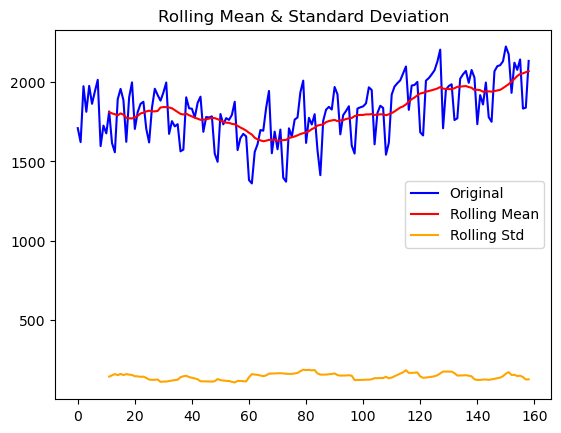

Test Statistic                  -0.234991
p-value                          0.934220
#Lags Used                      14.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


In [101]:
def check_stationarity(timeseries):
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='orange', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    # show the graph
    plt.show()
    
    # Perform Dickey-Fuller test
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    # print the dfoutput
    print(dfoutput)

check_stationarity(df['Footfalls'])

### 4. Split data into training and testing sets :

In [126]:
# split the dataset
train, test = train_test_split(df['Footfalls'], train_size=0.7, shuffle=False)

In [130]:
# print the first 70% rows in the dataset
train

0      1709
1      1621
2      1973
3      1812
4      1975
       ... 
106    1850
107    1836
108    1542
109    1617
110    1920
Name: Footfalls, Length: 111, dtype: int64

In [131]:
# print the last 30% rows in the datset
test

111    1971
112    1992
113    2010
114    2054
115    2097
116    1824
117    1977
118    1981
119    2000
120    1683
121    1663
122    2008
123    2024
124    2047
125    2073
126    2127
127    2203
128    1708
129    1951
130    1974
131    1985
132    1760
133    1771
134    2020
135    2048
136    2069
137    1994
138    2075
139    2027
140    1734
141    1917
142    1858
143    1996
144    1778
145    1749
146    2066
147    2099
148    2105
149    2130
150    2223
151    2174
152    1931
153    2121
154    2076
155    2141
156    1832
157    1838
158    2132
Name: Footfalls, dtype: int64

### 5. Build ARIMA model :

In [132]:
# fit the model into train dataset
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

### 6. Evaluate model :

In [136]:
# Evaluate the model for forecasting
pred = model_fit.forecast(steps=len(test))
# get the mse using test and pred value
mse = mean_squared_error(test, pred)
# print the mse
mse

70019.31247663753

### 7. Plot predicted vs actual data :

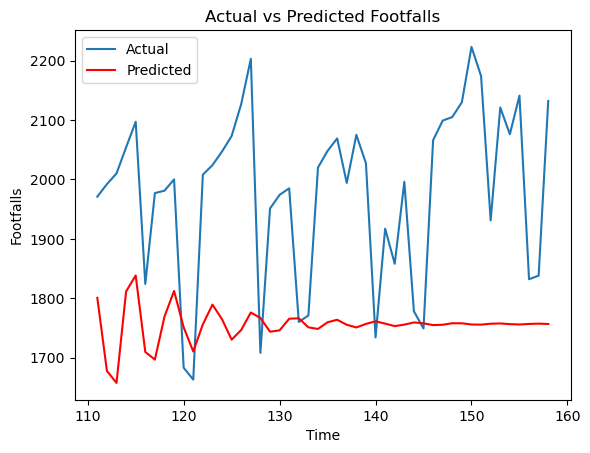

In [137]:
# Plot the graph
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, pred, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Footfalls')
plt.xlabel('Time')
plt.ylabel('Footfalls')
plt.show()

### 8. Forecast the next 10 footfalls :

In [138]:
# forecast the next 10 footfalls
forecast = model_fit.forecast(steps=10)
# print the forecast
forecast

111    1800.652343
112    1677.611242
113    1657.432678
114    1811.475536
115    1838.207879
116    1709.573426
117    1696.696712
118    1769.087845
119    1812.238666
120    1751.022983
Name: predicted_mean, dtype: float64

## 9. conclusion :

The predicted footfalls for the next 10 periods showing fluctuations around the mean value, indicating some variability in the forecast. However, the relatively high Mean Squared Error (MSE) of approximately 70019.31 suggests that the model's predictions may have significant deviations from the actual footfall values. Further refinement of the forecasting model may be required to improve its accuracy and reduce prediction errors.

### Thank you !!!